# Project: Data Science Pipeline

Author: Carolina Barros

This project utilizes data from **StyleSense**, a rapidly growing online women's clothing retailer, to predict whether a customer would recommend a product. The predictive model analyzes a variety of features—numerical, categorical, and textual—including the review text, customer age, product category, department name, high-level division, and the number of customers who found the review helpful. These inputs help determine the likelihood of a product recommendation.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [18]:
import pandas as pd

# Load data
df = pd.read_csv('data/reviews.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [19]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [20]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=38,
)

## Data Exploration

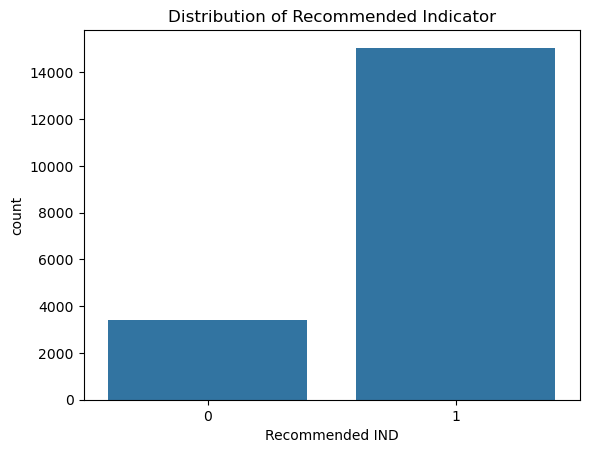

In [21]:
# import libraries for plotting data
import seaborn as sns
import matplotlib.pyplot as plt

# Check distribution of target variable
sns.countplot(data=data, x='Recommended IND')
plt.title('Distribution of Recommended Indicator')
plt.show()

The dataset is highly imbalanced, with significantly more observations in class 1 (15,000) compared to class 0 (3,500). 

A good modeling choice in this case could be a Random Forest, as it can help mitigate issues related to class imbalance.

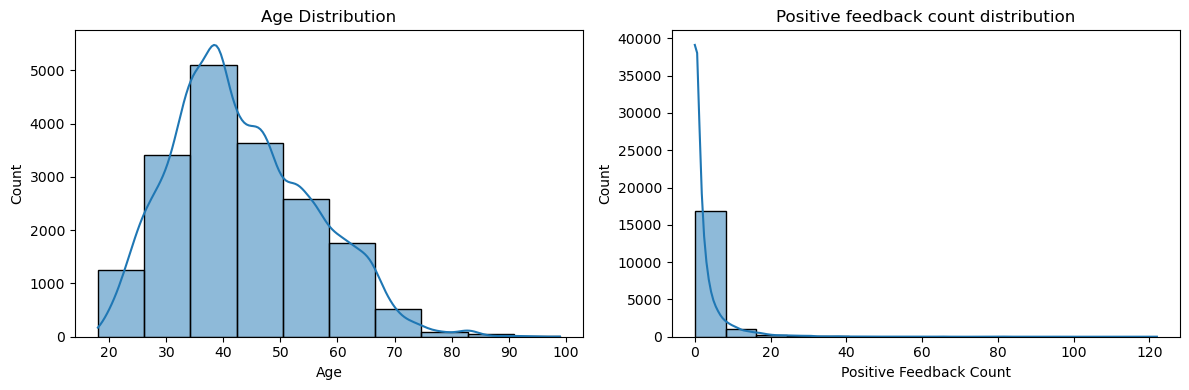

In [22]:
# Visualize numerical features
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data['Age'], kde=True, bins=10)
plt.title('Age Distribution')
plt.subplot(1,2,2)
sns.histplot(data['Positive Feedback Count'], kde=True,bins=15)
plt.title('Positive feedback count distribution')
plt.tight_layout()
plt.show()

- **Age**: The majority of customers are between **34 and 42 years old**.  
- **Positive Feedback**: Most reviews receive **fewer than 5 positive feedback responses** from customers.

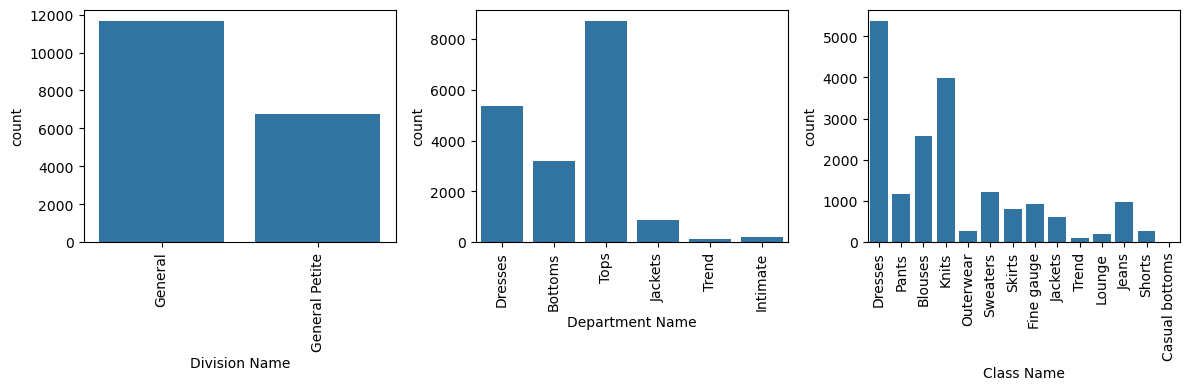

In [23]:
# Visualize categorical variables
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.countplot(data=data, x='Division Name')
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.countplot(data=data, x='Department Name')
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.countplot(data=data, x='Class Name')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- **Division Name**: Most customer reviews are for products in the **General division**, with nearly **12,000 reviews**. The **Petite division** follows with approximately **7,000 reviews**.
- **Department Name**: The majority of reviews come from the **Tops department**, while the **Trend department** has the fewest.
- **Class Name**: Most reviews are for **Dresses**, **Knits**, and **Blouses**, whereas **Casual Bottoms** received very few reviews.

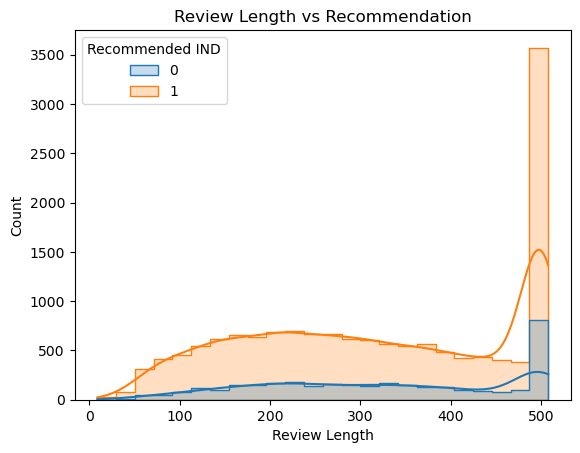

In [24]:
# Review length distribution
data['Review Length'] = data['Review Text'].fillna("").apply(len)
sns.histplot(data=data, x='Review Length', hue='Recommended IND', kde=True, element='step')
plt.title("Review Length vs Recommendation")
plt.show()

- **Review Length**: Longer reviews are more likely to include a positive recommendation. As shown in the graph, reviews with more than **450 characters** tend to have a higher probability of being recommended.

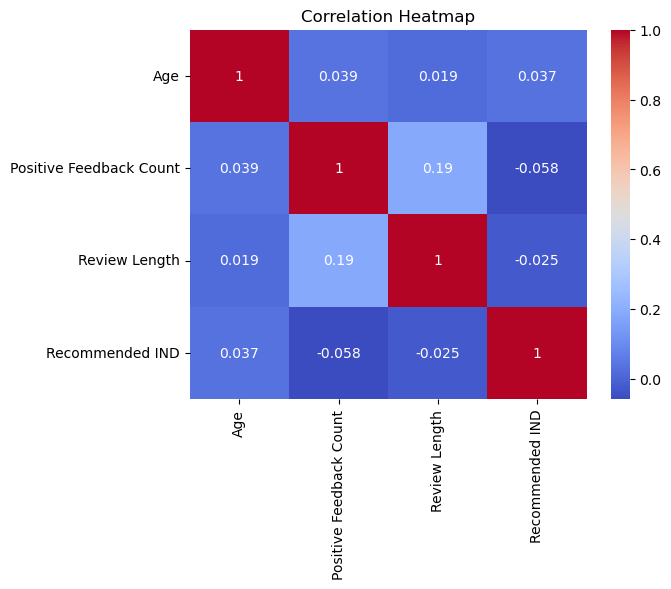

In [25]:
# Heatmap of correlation
sns.heatmap(data[['Age', 'Positive Feedback Count', 'Review Length', 'Recommended IND']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

- **Correlation Analysis**: The correlation between the numeric variables and the target variable is very low, suggesting that the relationship is likely **non-linear**. Therefore, a model like **Random Forest** would be more suitable for predicting product recommendations in this context.

## Building Pipeline

- **Pipeline Construction**: This section describes the process of building the machine learning pipelines. First, the data is separated into **numerical**, **categorical**, and **text** features to allow for appropriate preprocessing. Then, a dedicated preprocessing pipeline is constructed for each data type to ensure they are properly prepared for modeling.

In [26]:
from sklearn.pipeline import Pipeline

# Split into numerical, categorical and text features
num_features = (X.select_dtypes(exclude=['object']).columns.drop(['Clothing ID'],))
print('Numerical features:', num_features)

cat_features = (X[['Division Name','Department Name','Class Name',]].columns)
print('Categorical features:', cat_features)

text_features = (X[['Review Text']].columns)
print ('Review Text features:', text_features)

Numerical features: Index(['Age', 'Positive Feedback Count'], dtype='object')
Categorical features: Index(['Division Name', 'Department Name', 'Class Name'], dtype='object')
Review Text features: Index(['Review Text'], dtype='object')


### Numerical Pipeline

In [ ]:
# Create numerical pipeline for preprocessiing numerical features

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([('scaler',MinMaxScaler())])
num_pipeline

Pipeline(steps=[('scaler', MinMaxScaler())])

### Categorical Pipeline

In [ ]:
# Create categorical pipeline for preprocessiing categorical features

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ('ordinal_encoder',OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=-1,)),    
    ('cat_encoder',OneHotEncoder(
            sparse_output=False,
            handle_unknown='ignore',))])

cat_pipeline

Pipeline(steps=[('ordinal_encoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('cat_encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

### Text Feature Pipeline

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create CountCharacter()
# Takes in a string for the character to count and outputs the number times that character appears in the text

class CountCharacter(BaseEstimator, TransformerMixin):
    def __init__(self, character: str):
        self.character = character

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [[text.count(self.character)] for text in X]

In [ ]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Create initial_text_preprocess to make sure the text is in the expected shape for the CountCharacter().

initial_text_preprocess = Pipeline([('dimension_reshaper',FunctionTransformer(np.reshape,kw_args={'newshape':-1}))])

# create a pipeline for counting the number of spaces, `!`, and `?`
    
feature_engineering = FeatureUnion([
    ('count_spaces', CountCharacter(character=' ')),
    ('count_exclamations', CountCharacter(character='!')),
    ('count_question_marks', CountCharacter(character='?'))])

character_counts_pipeline = Pipeline([
    ('initial_text_preprocess',initial_text_preprocess,),
    ('feature_engineering',feature_engineering,)])

character_counts_pipeline

Pipeline(steps=[('initial_text_preprocess',
                 Pipeline(steps=[('dimension_reshaper',
                                  FunctionTransformer(func=<function reshape at 0x000001E21A9AA6B0>,
                                                      kw_args={'newshape': -1}))])),
                ('feature_engineering',
                 FeatureUnion(transformer_list=[('count_spaces',
                                                 CountCharacter(character=' ')),
                                                ('count_exclamations',
                                                 CountCharacter(character='!')),
                                                ('count_question_marks',
                                                 CountCharacter(character='?'))]))])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

nlp = spacy.load('en_core_web_sm')

# Create a custom transformer called SpacyLemmatizer to lemmatize the text

class SpacyLemmatizer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        lemmatized = [
            ' '.join(
                token.lemma_ for token in doc
                if not token.is_stop
            )
            for doc in self.nlp.pipe(X)
        ]
        return lemmatized   

In [ ]:
# Create a tfidf pipeline that uses the SpaceLemmatizer followed by a TfidVectorizer
tfidf_pipeline = Pipeline([
    ('dimension_reshaper',FunctionTransformer(np.reshape,kw_args={'newshape':-1})),
    ('lemmatizer',SpacyLemmatizer(nlp=nlp)),
    ('tfidf_vectorizer',TfidfVectorizer(stop_words='english'))])

tfidf_pipeline

Pipeline(steps=[('dimension_reshaper',
                 FunctionTransformer(func=<function reshape at 0x000001E21A9AA6B0>,
                                     kw_args={'newshape': -1})),
                ('lemmatizer',
                 SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x000001E2465B2470>)),
                ('tfidf_vectorizer', TfidfVectorizer(stop_words='english'))])

In [ ]:
from sklearn.compose import ColumnTransformer

# Combine feature engineering pipelines

feature_engineering = ColumnTransformer([
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features),
        ('character_counts', character_counts_pipeline, text_features),
        ('tfidf_text', tfidf_pipeline, text_features),
        ('title', TfidfVectorizer(max_features=1000, stop_words='english'), 'Title')
])

feature_engineering

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 Index(['Age', 'Positive Feedback Count'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1)),
                                                 ('cat_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Division Name', 'D...
                                 Pipeline(steps=[('dimension_reshaper',
                                                  FunctionTransformer(func=<function reshape at 0x000001E21A9AA6B0>,
                                                                      kw_args={'newshape': -1})),
                                                 ('lemmatizer',
                                                  SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x000001E2465B2470>)),
                                                 ('tfidf_vectorizer',
                                                  TfidfVectorizer(stop_words='english'))]),
                                 Index(['Review Text'], dtype='object')),
                                ('title',
                                 TfidfVectorizer(max_features=1000,
                                                 stop_words='english'),
                                 'Title')])

## Training Pipeline

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Create a model pipeline, by appending the feature engineering pipeline to a machine learning model (RandomForestClassifier) to be trained.

model_pipeline = make_pipeline(
    feature_engineering,
    RandomForestClassifier(class_weight='balanced',random_state=38),
)

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'Positive Feedback Count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_outp...
                                                                  ('lemmatizer',
                                                                   SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x000001E2465B2470>)),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer(stop_words='english'))]),
                                                  Index(['Review Text'], dtype='object')),
                                                 ('title',
                                                  TfidfVectorizer(max_features=1000,
                                                                  stop_words='english'),
                                                  'Title')])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=38))])

### Evaluate the model

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate the model after training and assess its accuracy

y_pred_forest_pipeline = model_pipeline.predict(X_test)
accuracy_forest_pipeline = accuracy_score(y_test, y_pred_forest_pipeline)

print('Accuracy:', accuracy_forest_pipeline)

c:\Users\Carolina\miniconda3\envs\nlp\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Accuracy: 0.8658172946597994


In [ ]:
from sklearn.metrics import classification_report

# Calculate additional evaluation metrics (precision and recall) to better assess the model

print(classification_report(y_test, y_pred_forest_pipeline))


              precision    recall  f1-score   support

           0       0.85      0.35      0.50       696
           1       0.87      0.99      0.92      2993

    accuracy                           0.87      3689
   macro avg       0.86      0.67      0.71      3689
weighted avg       0.86      0.87      0.84      3689



## Fine-Tuning Pipeline

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

# Custom scorer to optimize recall for class 0
recall_class0 = make_scorer(recall_score, pos_label=0)

# Define parameter grid
my_grid = dict(
    randomforestclassifier__max_features=[100, 150],
    randomforestclassifier__n_estimators=[150, 200],
)

# Set up GridSearchCV with custom scorer
param_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=my_grid,
    scoring=recall_class0,  # Optimize recall for class 0
    cv=5,
    n_jobs=-1,
    refit=True,
    verbose=3
)

# Run the search
param_search.fit(X_train, y_train)

# Best parameters
best_params = param_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'randomforestclassifier__max_features': 150, 'randomforestclassifier__n_estimators': 150}


In [42]:
model_best = param_search.best_estimator_
model_best

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'Positive Feedback Count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_outp...
                                                                   SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x000001E281362C80>)),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer(stop_words='english'))]),
                                                  Index(['Review Text'], dtype='object')),
                                                 ('title',
                                                  TfidfVectorizer(max_features=1000,
                                                                  stop_words='english'),
                                                  'Title')])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        max_features=150, n_estimators=150,
                                        random_state=38))])

In [43]:
y_pred_forest_pipeline = model_best.predict(X_test)
accuracy_forest_pipeline = accuracy_score(y_test, y_pred_forest_pipeline)

print('Accuracy:', accuracy_forest_pipeline)

c:\Users\Carolina\miniconda3\envs\nlp\lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Accuracy: 0.867985904039035


In [44]:
print(classification_report(y_test, y_pred_forest_pipeline))


              precision    recall  f1-score   support

           0       0.85      0.37      0.51       696
           1       0.87      0.98      0.92      2993

    accuracy                           0.87      3689
   macro avg       0.86      0.68      0.72      3689
weighted avg       0.87      0.87      0.85      3689

